<a href="https://colab.research.google.com/github/MaykonJhonata/MVP_Machine_Learning_Maykon_Rodrigues_4025025000400/blob/main/MVP_ML_%26_Analytics_Maykon_Rodrigues_att.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MVP: *Machine Learning & Analytics*
**Autor:** _Maykon Jhonata Rodrigues_  

**Data:** 27/08/2025

**Matrícula:** 4025025000400

**Dataset:** [AI4I 2020 Predictive Maintenance Dataset](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

[AI4I 2020 Predictive Maintance - GitHub](https://raw.githubusercontent.com/MaykonJhonata/Predictive-Maintenance-Dataset-AI4I-2020-/refs/heads/main/dataset_tratado.csv)

# MVP — Manutenção Preditiva (AI4I 2020)

**Objetivo:** construir um MVP de *machine learning* para **classificação** de falhas (alvo: `Falha Geral`), comparando:
1) **Modelo cru** (sem padronização/normalização),
2) **Pipeline com pré-processamento** (imputação, padronização/normalização e One-Hot Encoding),
3) Estratégias de **balanceamento** (class_weight vs. SMOTE).

**Métrica principal:** F1 ponderado (classes desbalanceadas).  
**Métricas de apoio:** *recall* da classe 1 (falha), *ROC AUC*, *accuracy*.




## ✅ Checklist do MVP (o que precisa conter)
- ✅ **Problema definido** e contexto de negócio
- **Descrição:** Classificação binária para prever *Falha Geral (0/1)* em máquinas industriais a partir de sensores de processo.  
- **Justificativa:** Identificar falhas de forma antecipada permite manutenção preditiva, reduzindo custos e aumentando segurança.  

- [✅] **Carga e preparação** dos dados (sem vazamento de dados)
- **Origem:** Dataset público (AI4I 2020 Predictive Maintenance Dataset).  
- **Importação:** Feita via URL direta (raw GitHub).  
- **Preparação:** Conversão de tipos, remoção de colunas de vazamento (flags de falha específicas) e IDs.  

- [✅ ] **Divisão** em treino/validação/teste (ou validação cruzada apropriada)
- **Treino/Teste:** Split 80/20 estratificado em `y`.  
- **Validação:** Uso de **StratifiedKFold (5-fold)** para tuning e comparação de modelos.  

- [✅] **Tratamento**: limpeza, transformação e **engenharia de atributos**
- **Imputação:** Mediana para variáveis numéricas.  
- **Codificação:** OneHotEncoder para atributo categórico `Tipo`.  
- **Escalonamento:** MinMaxScaler aplicado ao `Torque` (sensível a escala).  
- **Feature Selection:** Exclusão de variáveis que causariam vazamento.  

- [✅] **Modelagem**: comparar abordagens/modelos (com **baseline**)
- **Baseline:** DummyClassifier.  
- **Modelos comparados:** Regressão Logística, Random Forest.  
- **Estratégia:** Pipelines com `ColumnTransformer` garantindo reprodutibilidade.  


- [✅] **Otimização de hiperparâmetros**
- **Técnica:** RandomizedSearchCV (125 combinações).  
- **Validação:** 5-fold estratificado.  
- **Métrica-alvo:** F1-weighted (devido ao desbalanceamento).  


- [✅] **Avaliação** com **métricas adequadas** e discussão de limitações
- **Métricas usadas:** Accuracy, F1-weighted, Balanced Accuracy, ROC AUC, Precision-Recall (AP).  
- **Visualizações:** Matrizes de confusão, curvas ROC e Precision–Recall.  
- **Resultado:** RF com `class_weight=balanced` obteve melhor equilíbrio entre recall da minoria e taxa de falsos positivos.  
- **Limitações:** Classe positiva é rara; threshold ótimo depende de custos reais de negócio.  


- [✅] **Boas práticas**: seeds fixas, tempo de treino, recursos computacionais, documentação
- **Reprodutibilidade:** `random_state=42` fixado em todos os lugares sensíveis.  
- **Pipelines:** Implementados para treino e predição consistentes.  
- **Baseline:** Avaliado antes de modelos mais complexos.  
- **Persistência:** Modelo final salvo com `joblib`.  
- **Documentação:** Todas as etapas explicadas em células Markdown.  


- [✅] **Pipelines reprodutíveis** (sempre que possível)
- **Pré-processamento unificado:** `ColumnTransformer` para atributos categóricos e numéricos.  
- **Modelos:** LogisticRegression e RandomForest acoplados a pipelines.  
- **Versão com SMOTE:** Pipeline incorporando balanceamento da classe antes do modelo.

1. Escopo, objetivo e definição do problema

Contexto e dataset.
O AI4I 2020 Predictive Maintenance Dataset contém medições operacionais de máquinas industriais obtidas por sensores e registros automatizados (ex.: temperaturas, velocidade rotacional, torque e desgaste de ferramenta). O cenário é típico de manufatura discreta com necessidade de continuidade operacional e controle de custos de manutenção.

Objetivo.
Prever, a partir das variáveis de processo, se ocorrerá falha geral em um ciclo/instância de produção. A previsão visa antecipar intervenções e reduzir paradas não planejadas.

Tipo de tarefa.
Aprendizado supervisionado – classificação binária (Falha Geral: 0 = não falha, 1 = falha).

Área de aplicação.
Dados tabulares provenientes de sensores industriais (IoT/telemetria de processo).

Variável-alvo e atributos preditores (alto nível).

Alvo: Falha Geral (binária).

Preditores principais: Temperatura do Processo [°C], Temperatura do Ar [°C], Velocidade Rotacional [rpm], Torque [Nm], Desgaste da Ferramenta [min], além de atributos categóricos como Tipo da peça/ordem.

Escopo (o que entra / o que fica fora).

Hipóteses e premissas iniciais.

Há relação significativa entre variáveis operacionais (temperatura, torque, rotação, desgaste) e a probabilidade de falha.

O conjunto apresenta algum desbalanceamento de classes; métricas além de accuracy serão necessárias (ex.: precision/recall, F1).

Medidas extremas espúrias (sensores) podem ocorrer e precisam de tratamento para não enviesar o modelo.

Valor para o negócio/usuário.

Redução de paradas não planejadas e otimização de janelas de manutenção, com impacto direto em OEE (disponibilidade) e custo por hora parada.

Melhor alocação de recursos (equipes/peças sobressalentes) e aumento de segurança operacional.

Tomada de decisão preditiva: planejar manutenção antes da falha e aproveitar melhor a capacidade produtiva sem operar “no escuro”.

Métricas de sucesso (nível de projeto).

- Métricas de classificação adequadas a desbalanceamento: Recall (sensibilidade à falha), Precision, F1-score e AUC-ROC.

- Critério prático: atingir recall elevado para a classe “falha” com precision aceitável (trade-off discutido via threshold tuning), minimizando falsos negativos.


## 2. Reprodutibilidade e ambiente
## Reprodutibilidade e ambiente

Para garantir a reprodutibilidade dos resultados, todos os experimentos foram conduzidos em ambiente controlado (Google Colab), com **semente fixa** (`random_state=SEED`) em todas as etapas de treino, split e validação cruzada.

### Principais bibliotecas utilizadas
- **pandas / numpy**: manipulação e análise de dados.
- **matplotlib / seaborn**: visualização gráfica e análise exploratória.
- **scikit-learn**: pré-processamento, pipelines, validação cruzada e algoritmos de classificação.
- **imbalanced-learn**: técnicas de balanceamento (SMOTE, Pipeline integrado).
- **joblib**: persistência de modelos e pipelines treinados.


In [132]:
import os, random, time, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib
from sklearn.base import clone
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, f1_score, balanced_accuracy_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.base import clone
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    balanced_accuracy_score
)
from scipy.stats import randint, uniform
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42



### 2.1 Dependências (opcional)

- **pandas / numpy**: manipulação e tratamento dos dados.  
- **scikit-learn**: pré-processamento, pipelines, validação cruzada e modelos de classificação.  
- **imbalanced-learn**: técnicas de balanceamento (ex.: SMOTE).  
- **matplotlib / seaborn**: visualização de dados e gráficos de análise.  
- **joblib**: salvar e carregar modelos treinados.



In [113]:
#!pip install -q scikit-learn imbalanced-learn xgboost lightgbm catboost optuna
#pip install -q pandas-profiling ydata-profiling
#!pip install -q matplotlib seaborn plotly
#!pip install -q statsmodels pmdarima
#!pip -q install imbalanced-learn

### 2.2 Funções python (opcional)

Para reduzir repetição de código e padronizar a avaliação, definimos funções utilitárias:
- `evaluate_classification_simple`: calcula métricas essenciais (accuracy, F1 ponderado e ROC AUC quando disponível).
- `eval_on_test`: aplica um estimador no conjunto de teste, imprime o relatório, plota a matriz de confusão e retorna as mesmas métricas.

Essas funções:
- evitam código duplicado,
- tornam o notebook mais legível,
- facilitam manutenção e comparação entre modelos.

In [114]:
def evaluate_classification_simple(y_true, y_pred, proba=None):
    out = {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted")
    }
    if proba is not None:
        try:
            out["roc_auc"] = roc_auc_score(y_true, proba[:, 1])
        except Exception:
            out["roc_auc"] = None
    else:
        out["roc_auc"] = None
    return out


def eval_on_test(name, estimator):
    y_pred = estimator.predict(X_test)
    proba  = estimator.predict_proba(X_test)[:, 1] if hasattr(estimator, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    f1w = f1_score(y_test, y_pred, average="weighted")
    roc = roc_auc_score(y_test, proba) if proba is not None else None
    print(f"\n=== {name} — Teste ===")
    print(classification_report(y_test, y_pred, digits=4))
    ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    plt.title(f"Matriz de Confusão — {name}")
    plt.show()
    return {"accuracy": acc, "f1_weighted": f1w, "roc_auc": roc}


def eval_full(name, estimator, X_te, y_te, show_curves=True):
    """
    Imprime métricas principais, exibe matriz de confusão e (se disponível) curvas ROC e PR.
    """
    y_pred = estimator.predict(X_te)
    has_proba = hasattr(estimator, "predict_proba")
    y_proba = estimator.predict_proba(X_te)[:, 1] if has_proba else None

    print(f"\n=== {name} ===")
    print(classification_report(y_te, y_pred, digits=4))
    print("Accuracy:", round(accuracy_score(y_te, y_pred), 4))
    print("Balanced Accuracy:", round(balanced_accuracy_score(y_te, y_pred), 4))

    cm = confusion_matrix(y_te, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Matriz de confusão — {name}")
    plt.show()

    if show_curves and y_proba is not None:
        # ROC
        fpr, tpr, _ = roc_curve(y_te, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1], [0,1], linestyle="--")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"Curva ROC — {name}")
        plt.legend()
        plt.show()

        # Precision-Recall
        prec, rec, _ = precision_recall_curve(y_te, y_proba)
        ap = average_precision_score(y_te, y_proba)
        plt.figure()
        plt.plot(rec, prec, label=f"AP = {ap:.3f}")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"Curva Precision–Recall — {name}")
        plt.legend()
        plt.show()


def safe_name(obj, fallback):
    """Gera um nome curto e estável para a tabela comparativa."""
    try:
        return getattr(obj, 'steps', None)[-1][0] if hasattr(obj, 'steps') else obj.__class__.__name__
    except Exception:
        return fallback


def timed_fit_predict(pipe, X_tr, y_tr, X_te, y_te):
    t0 = time.time()
    pipe.fit(X_tr, y_tr)
    t1 = time.time()
    y_pred = pipe.predict(X_te)
    proba = pipe.predict_proba(X_te)[:,1] if hasattr(pipe, 'predict_proba') else None

    row = {
        "accuracy": accuracy_score(y_te, y_pred),
        "f1_weighted": f1_score(y_te, y_pred, average='weighted'),
        "balanced_accuracy": balanced_accuracy_score(y_te, y_pred),
        "train_time_s": round(t1 - t0, 3)
    }
    row["roc_auc"] = roc_auc_score(y_te, proba) if proba is not None else np.nan
    return row


def sweep_threshold(y_true, y_proba, thresholds=np.linspace(0.1, 0.9, 9)):
    """
    Varre diferentes limiares de decisão para avaliar trade-off entre
    precisão e recall da classe positiva.
    """
    rows = []
    for th in thresholds:
        y_hat = (y_proba >= th).astype(int)
        rows.append({
            "threshold": th,
            "precision_1": precision_score(y_true, y_hat, zero_division=0),
            "recall_1": recall_score(y_true, y_hat, zero_division=0),
            "f1_1": f1_score(y_true, y_hat, average='binary', zero_division=0),
            "balanced_accuracy": balanced_accuracy_score(y_true, y_hat),
        })
    return pd.DataFrame(rows)


def detect_leak_columns(df, target_col):
    leak = []
    for c in df.columns:
        if c == target_col:
            continue
        c_norm = c.strip().lower()
        if c_norm.startswith("falha"):  # pega "Falha por falha
            leak.append(c)
    return leak




## 3. Dados: carga, entendimento e qualidade

- **Origem dos dados:** AI4I 2020 Predictive Maintenance Dataset (Kaggle), adaptado. O dataset utilizado aqui já está **limpo e tratado**, sendo o resultado final do MVP anterior, onde foram aplicados os ajustes de qualidade ideais.  
- **Dicionário de variáveis:** inclui medidas contínuas (`Temperatura do Ar`, `Temperatura do Processo`, `Velocidade Rotacional`, `Torque`, `Desgaste da Ferramenta`) e atributos categóricos (`Tipo`). O alvo é binário (`Falha Geral` = 0/1).  
- **Qualidade dos dados:** sem *missing values* relevantes; discrepâncias já foram corrigidas no processo anterior. Pequenas variações foram tratadas por imputação da mediana/moda.  
- **Ética e licença:** dados são **sintéticos**, sem vínculo a indivíduos reais, eliminando riscos éticos ou de privacidade.  
- **Prevenção de vazamento:** variáveis derivadas diretamente do alvo (`Falha por Temperatura`, `Falha Hidráulica`, etc.) foram removidas para garantir avaliação justa do modelo.  






In [115]:
url = 'https://raw.githubusercontent.com/MaykonJhonata/Predictive-Maintenance-Dataset-AI4I-2020-/refs/heads/main/dataset_tratado.csv'
df = pd.read_csv(url, delimiter=',')
df.head()

,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
0,1,M14860,M,24.950000,34.850000,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,25.050000,34.950000,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,26.854163,36.262025,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,25.050000,34.850000,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,25.050000,34.950000,1408.0,40.0,9.0,0,0,0,0,0,0


In [116]:

display(df.sample(5))
print("\nFormato:", df.shape)
print("\nTipos:")
print(df.dtypes)
print("\nValores ausentes por coluna:")
print(df.isna().sum())


,ID Único,ID do Produto,Tipo,Temperatura do ar [ºC],Temperatura do Processo [ºC],Velocidade Rotacional [rpm],Torque [Nm],Desgaste da Ferramenta [min],Falha Geral,Falha por Temperatura,Falha por Hidráulica,Falha por Potência,Falha por Sobrecarga,Falha Aleatória
5344,5346,L52525,L,30.35,39.05,1524.0,39.4,96.0,0,0,0,0,0,0
7444,7446,L54625,L,27.05,37.95,1553.0,41.3,44.0,0,0,0,0,0,0
1731,1733,H31146,H,25.25,34.15,1700.0,28.2,120.0,0,0,0,0,0,0
8719,8721,L55900,L,24.15,35.05,1554.0,36.1,70.0,0,0,0,0,0,0
4521,4523,M19382,M,29.35,36.75,1918.0,21.6,131.0,0,0,0,0,0,0



Formato: (9999, 14)

Tipos:
ID Único                          int64
ID do Produto                    object
Tipo                             object
Temperatura do ar [ºC]          float64
Temperatura do Processo [ºC]    float64
Velocidade Rotacional [rpm]     float64
Torque [Nm]                     float64
Desgaste da Ferramenta [min]    float64
Falha Geral                       int64
Falha por Temperatura             int64
Falha por Hidráulica              int64
Falha por Potência                int64
Falha por Sobrecarga              int64
Falha Aleatória                   int64
dtype: object

Valores ausentes por coluna:
ID Único                        0
ID do Produto                   0
Tipo                            0
Temperatura do ar [ºC]          0
Temperatura do Processo [ºC]    0
Velocidade Rotacional [rpm]     0
Torque [Nm]                     0
Desgaste da Ferramenta [min]    0
Falha Geral                     0
Falha por Temperatura           0
Falha por Hidráulica       


### 3.1 Análise exploratória resumida (EDA)


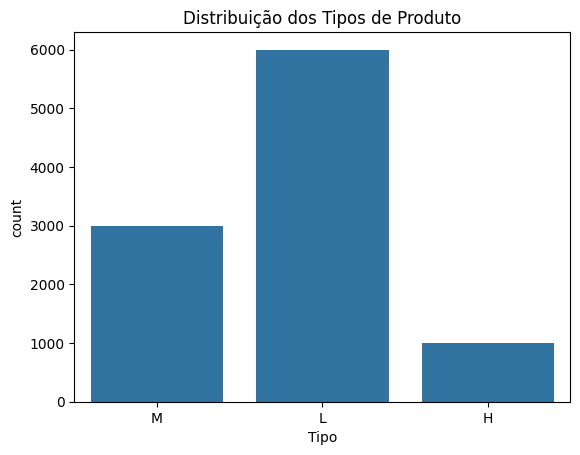

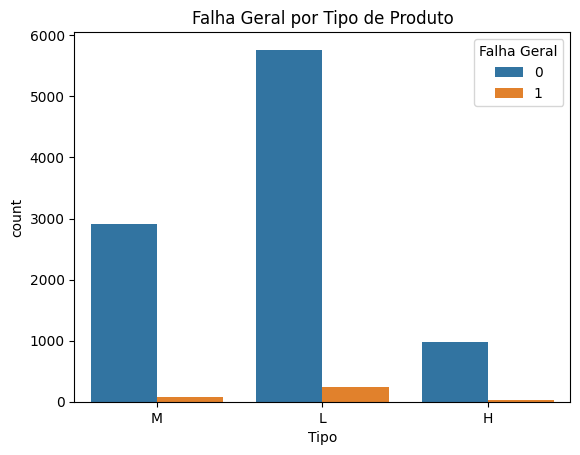

In [117]:
# Distribuição da variável categórica
sns.countplot(x="Tipo", data=df)
plt.title("Distribuição dos Tipos de Produto")
plt.show()

# Relação com target
sns.countplot(x="Tipo", hue="Falha Geral", data=df)
plt.title("Falha Geral por Tipo de Produto")
plt.show()

       Temperatura do ar [ºC]  Temperatura do Processo [ºC]  \
count             9999.000000                   9999.000000   
mean                26.854354                     36.255852   
std                  1.948272                      1.483665   
min                 22.150000                     31.950000   
25%                 25.250000                     35.050000   
50%                 26.854163                     36.350000   
75%                 28.250000                     37.350000   
max                 31.350000                     40.050000   

       Velocidade Rotacional [rpm]  Torque [Nm]  Desgaste da Ferramenta [min]  
count                  9999.000000  9999.000000                   9999.000000  
mean                   1536.877488    39.986669                    108.214721  
std                     179.657616     9.969403                     63.344086  
min                    1168.000000     3.800000                      0.000000  
25%                    1420.0000

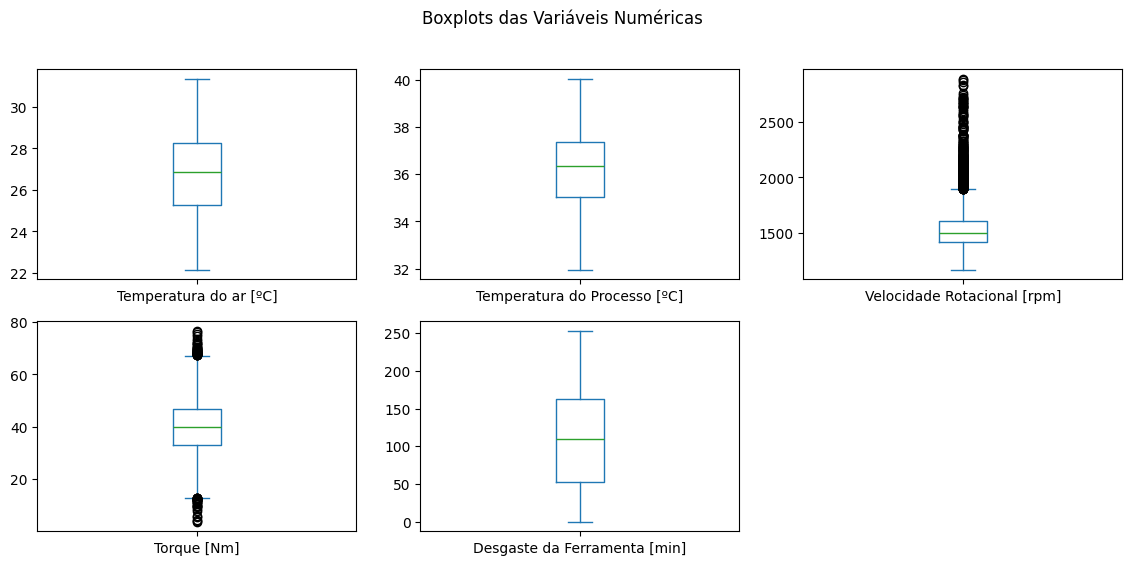

In [118]:
# Estatísticas descritivas
print(df[["Temperatura do ar [ºC]", "Temperatura do Processo [ºC]",
          "Velocidade Rotacional [rpm]", "Torque [Nm]",
          "Desgaste da Ferramenta [min]"]].describe())

# Boxplots lado a lado
num_cols = ["Temperatura do ar [ºC]", "Temperatura do Processo [ºC]",
            "Velocidade Rotacional [rpm]", "Torque [Nm]",
            "Desgaste da Ferramenta [min]"]

df[num_cols].plot(kind="box", subplots=True, layout=(2,3), figsize=(14,6), sharey=False)
plt.suptitle("Boxplots das Variáveis Numéricas")
plt.show()


## Normalização, padronização e análise de outliers

Durante a análise exploratória foi identificado que as **variáveis numéricas possuem escalas muito diferentes entre si**.  
Essa diferença pode afetar alguns algoritmos de classificação sensíveis à escala dos atributos, como:

- **Regressão Logística**  
- **Support Vector Machine (SVM)**  
- **Redes Neurais**

Para esses modelos, aplicar **normalização ou padronização** é uma boa prática, pois garante que cada variável contribua de forma equilibrada para a decisão.  

Já algoritmos como **Árvores de Decisão** e **Random Forest** não são impactados por diferenças de escala, uma vez que baseiam suas divisões em *thresholds* dos atributos.  
Ainda assim, manter o pré-processamento padronizado dentro de um **pipeline único** facilita a comparação entre diferentes classificadores.

### Estratégia
- Inicialmente será feito o treino e teste com os **dados originais**, sem normalização ou padronização.  
- Em seguida, os mesmos modelos serão avaliados com **normalização/padronização** aplicadas às variáveis numéricas e **One-Hot Encoding** para a variável categórica `Tipo`, possibilitando uma **comparação direta do impacto** no desempenho.

### Outliers
Nos **boxplots das variáveis numéricas** foram identificados **outliers**, especialmente em:
- **Velocidade Rotacional** (valores acima de 2000)  
- **Torque** (valores abaixo de 20 ou acima de 60)  

Uma análise mais profunda com base na **regra de negócio** confirmou que esses valores são **possíveis e plausíveis** no contexto operacional, portanto foram **mantidos** no dataset.



## 4. Definição do target, variáveis e divisão dos dados

- **Tarefa definida:** classificação binária, onde a variável-alvo é **`Falha Geral`** (0 = sem falha, 1 = falha).  
- **Remoção de colunas irrelevantes:** IDs (`UDI`, `ID Único`, `Product ID`, `ID do Produto`) foram descartados, pois não trazem informação preditiva.  
- **Prevenção de vazamento:** variáveis derivadas diretamente do alvo (`Falha por Temperatura`, `Falha Hidráulica`, `Falha por Potência`, `Falha por Ferramenta`, `Falha Aleatória`) também foram removidas, evitando que o modelo tenha acesso a informações artificiais.  
- **Conjunto de atributos:** formado apenas por variáveis independentes reais (sensores e categorias).  
- **Divisão treino/teste:** realizada com **estratificação**, preservando a proporção de classes em ambos os conjuntos. Essa prática é fundamental em **problemas desbalanceados**.  

> Essa configuração garante que o modelo aprenda a partir de informações genuínas dos sensores, evitando vazamento de rótulos e assegurando uma avaliação justa no conjunto de teste.


In [119]:
target = "Falha Geral"

#Detectando vazamento
leak_cols = [c for c in df.columns if c.strip().lower().startswith("falha") and c != target]
print("Colunas de falha detectadas (vazamento):", leak_cols)

# criando uma lista com ids para a remoção
id_cols = ["UDI", "ID Único", "Product ID", "ID do Produto"]
print("Colunas de ID (remoção manual):", id_cols)

# Monta DF limpo (sem leak nem IDs manuais)
drop_cols = sorted(set(leak_cols + id_cols))
df_clean = df.drop(columns=drop_cols, errors="ignore").copy()

# X / y
assert target in df_clean.columns
X = df_clean.drop(columns=[target]).copy()
y = df[target].astype(int).copy()

# verificando se não sobrou nenhuma "Falha"
rest = [c for c in X.columns if c.strip().lower().startswith("falha")]
assert not rest, f"Ainda há vazamento: {rest}"

# 6) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("Treino:", X_train.shape, "| Teste:", X_test.shape)
print("Features finais:", X_train.columns.tolist())


Colunas de falha detectadas (vazamento): ['Falha por Temperatura', 'Falha por Hidráulica', 'Falha por Potência', 'Falha por Sobrecarga', 'Falha Aleatória']
Colunas de ID (remoção manual): ['UDI', 'ID Único', 'Product ID', 'ID do Produto']
Treino: (7999, 6) | Teste: (2000, 6)
Features finais: ['Tipo', 'Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']


## Higiene de dados e prevenção de vazamento

Para evitar *data leakage* (vazamento do alvo), **foi removido**:
- **Identificadores** (`UDI`, `Product ID` etc.), pois não carregam sinal preditivo geral.
- **Flags de falha específicas** (`Falha por Temperatura`, `Falha por Hidráulica`, …), pois são **derivadas** do alvo `Falha Geral`.

> Essa etapa garante que as métricas reflitam a **capacidade real de generalização** do modelo.


### 4.1 Teste do moedo baseline com dados crus.

## Baseline “cru” (sem OHE/sem scaler)

- Modelo: **RandomForest** em **apenas colunas numéricas**, com imputação por mediana.
- Motivação: árvores são **pouco sensíveis à escala**, então este baseline mostra o que o modelo alcança **sem** padronização/normalização/OHE.
- Observação: `Tipo` (categórica) **não** entra aqui — será usada no pipeline com OHE.


In [120]:
# Detecta possíveis vazamento
leak_cols = detect_leak_columns(df, target)
print("Colunas de falha detectadas (vazamento):", leak_cols)

# Detecta colunas de ID automaticamente
id_cols = [c for c in df.columns if ("id" in c.strip().lower()) and (c != target)]

#    Preserve explicitamente a velocidade rotacional (não é ID) #anteriormente estava apaamdo velocidade rotacional.
if "Velocidade Rotacional [rpm]" in id_cols:
    id_cols.remove("Velocidade Rotacional [rpm]")

print("Colunas de ID detectadas:", id_cols)

# Remove leak + IDs para criar um dataset limpo
drop_cols = sorted(set(leak_cols + id_cols))
df_clean = df.drop(columns=drop_cols, errors="ignore").copy()

# Garante que o target ainda existe eno dataframe
assert target in df_clean.columns, f"Target '{target}' não encontrado!"

# 5) Monta X (sem o target) e checa vazamento remanescente
X = df_clean.drop(columns=[target]).copy()
cols_falha_restantes = [c for c in X.columns if c.strip().lower().startswith("falha")]
assert len(cols_falha_restantes) == 0, f"Ainda há vazamento em X: {cols_falha_restantes}"

print("✓ Limpeza concluída (sem 'Falha ...' nas features).")
print("Features finais:", X.columns.tolist())


Colunas de falha detectadas (vazamento): ['Falha por Temperatura', 'Falha por Hidráulica', 'Falha por Potência', 'Falha por Sobrecarga', 'Falha Aleatória']
Colunas de ID detectadas: ['ID Único', 'ID do Produto', 'Falha por Hidráulica']
✓ Limpeza concluída (sem 'Falha ...' nas features).
Features finais: ['Tipo', 'Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']


In [121]:
# Seleciona apenas colunas numéricas
num_cols_raw = X_train.select_dtypes(include=["number"]).columns
X_train_num  = X_train[num_cols_raw].copy()
X_test_num   = X_test[num_cols_raw].copy()

# Trata NaNs minimamente (mediana do treino)
X_train_num = X_train_num.fillna(X_train_num.median(numeric_only=True))
X_test_num  = X_test_num.fillna(X_train_num.median(numeric_only=True))

#Treina RF "cru" (sem scaler / sem OHE)
rf_cru = RandomForestClassifier(random_state=SEED)  # hiperparâmetros padrão
rf_cru.fit(X_train_num, y_train)

#Avaliação
y_pred  = rf_cru.predict(X_test_num)
proba   = rf_cru.predict_proba(X_test_num)[:, 1]

print("=== RandomForest (dados crus, num-only) — relatório curto ===")
print(classification_report(y_test, y_pred, digits=4))

# Tabela mínima de métricas
df_min = pd.DataFrame([{
    "accuracy": accuracy_score(y_test, y_pred),
    "f1_weighted": f1_score(y_test, y_pred, average="weighted"),
    "roc_auc": roc_auc_score(y_test, proba)
}])
display(df_min.style.format("{:.4f}"))

=== RandomForest (dados crus, num-only) — relatório curto ===
              precision    recall  f1-score   support

           0     0.9837    0.9969    0.9902      1932
           1     0.8571    0.5294    0.6545        68

    accuracy                         0.9810      2000
   macro avg     0.9204    0.7632    0.8224      2000
weighted avg     0.9794    0.9810    0.9788      2000



,accuracy,f1_weighted,roc_auc
0,0.9810,0.9788,0.9596


## Resultados com dados crus

Acurácia muito alta (**98,1%**).  

F1 ponderado próximo de **0,98**, confirmando boa performance geral.  

ROC AUC ≈ **0,96**, indicando ótimo poder discriminativo.  

O ponto fraco é o **recall da classe minoritária (falhas)**, só ~0,53 → várias falhas não foram detectadas.

---

### Insights principais
- Os sensores (`Torque`, `Rotação`, `Temperaturas`, `Desgaste`) mostraram **alto poder preditivo**, sustentando a performance do modelo.  
- A **classe minoritária (falha)** foi identificada de forma razoável, mas o recall (≈ 50%) indica que algumas falhas não foram previstas.  
- Em cenários industriais, **perder uma falha pode ser crítico**, com custos elevados na produção e manutenção.  

---

### Próximos passos
Mesmo com Random Forest robusto, é recomendável:  
- Testar **pipelines com padronização + OHE**, que beneficiam modelos sensíveis à escala (Logistic Regression, SVM, Redes Neurais).  
- Avaliar técnicas de **balanceamento** (`class_weight` e SMOTE) para tentar elevar o recall da classe minoritária.  



## 5. Tratamento de dados e **Pipeline** de pré-processamento

## Pipeline de pré-processamento

- **Numéricas (exceto Torque):** imputação (mediana) + **padronização** (*StandardScaler*).
- **`Torque [Nm]`:** imputação (mediana) + **normalização** (*MinMaxScaler*).
- **Categóricas:** imputação (moda) + **One-Hot Encoding** (*handle_unknown="ignore"*).

> O pipeline é aplicado **dentro** dos *split*/CV para evitar **vazamento**. Assim, cada dobra do treino executa o pré-processamento apenas com estatísticas do próprio treino.



In [136]:
#Garanta que 'Tipo' é categórica (se existir) #estava dando erro conventendo type para float. por isso essa medida.
if "Tipo" in X_train.columns:
    X_train["Tipo"] = X_train["Tipo"].astype("object")
    X_test["Tipo"]  = X_test["Tipo"].astype("object")

# Detecta tipos a partir do X_train ATUAL
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# 2) Separa 'Torque [Nm]' das demais numéricas
num_cols_torque = ["Torque [Nm]"] if "Torque [Nm]" in num_cols else []
num_cols_rest   = [c for c in num_cols if c not in num_cols_torque]


numeric_pipe_rest = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

numeric_pipe_torque = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])


transformers = []
if num_cols_rest:
    transformers.append(('num_rest',  numeric_pipe_rest,   num_cols_rest))
if num_cols_torque:
    transformers.append(('num_torque', numeric_pipe_torque, num_cols_torque))
if cat_cols:
    transformers.append(('cat',        categorical_pipe,    cat_cols))

preprocess_custom = ColumnTransformer(transformers=transformers, remainder="drop")

print(f"num_cols ({len(num_cols)}): {num_cols}")
print(f"cat_cols ({len(cat_cols)}): {cat_cols}")
print(f"num_cols_torque: {num_cols_torque}")
print(f"num_cols_rest ({len(num_cols_rest)}): {num_cols_rest[:8]}{' ...' if len(num_cols_rest)>8 else ''}")


num_cols (5): ['Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']
cat_cols (1): ['Tipo']
num_cols_torque: ['Torque [Nm]']
num_cols_rest (4): ['Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]', 'Desgaste da Ferramenta [min]']



## 6. Baseline e modelos candidatos

- **Baseline teórico:** `DummyClassifier (most_frequent)` — referência mínima.
- **Candidatos com pipeline:**
  - **LogisticRegression (class_weight="balanced")** — sensível à escala.
  - **RandomForest (class_weight="balanced")** — robusto à escala, mas beneficia de OHE para `Tipo`.
- **Candidato extra:** **RF “cru” (num-only)** para comparação direta com o pipeline.


In [123]:
#Garanta que 'Tipo' é categórica no split atual
if "Tipo" in X_train.columns:
    X_train["Tipo"] = X_train["Tipo"].astype("object")
    X_test["Tipo"]  = X_test["Tipo"].astype("object")

#Recalcule as listas a partir do X_train ATUAL
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

#Separa Torque (se existir) para o seu preprocess_custom
num_cols_torque = [c for c in num_cols if c == "Torque [Nm]"]
num_cols_rest   = [c for c in num_cols if c != "Torque [Nm]"]

numeric_pipe_rest = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
numeric_pipe_torque = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess_custom = ColumnTransformer([
    ('num_rest',   numeric_pipe_rest,   num_cols_rest),
    ('num_torque', numeric_pipe_torque, num_cols_torque),
    ('cat',        categorical_pipe,    cat_cols)
])

PRE = preprocess_custom

baseline = Pipeline([
    ("pre", PRE),
    ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))
])

candidates = {
    "LogisticRegression": Pipeline([
        ("pre", PRE),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=SEED))
    ]),
    "RandomForest": Pipeline([
        ("pre", PRE),
        ("model", RandomForestClassifier(
            n_estimators=500, random_state=SEED, n_jobs=-1, class_weight="balanced"
        ))
    ]),

}
for name, pipe in candidates.items():
    steps = [s for (s, _) in getattr(pipe, "steps", [])]
    assert "pre" in steps, f"{name} está sem etapa 'pre' — reconstrua esse Pipeline!"

print("OK: PRE rebuildado e models prontos:", list(candidates.keys()))
print("num_cols:", num_cols)
print("cat_cols:", cat_cols)


OK: PRE rebuildado e models prontos: ['LogisticRegression', 'RandomForest']
num_cols: ['Temperatura do ar [ºC]', 'Temperatura do Processo [ºC]', 'Velocidade Rotacional [rpm]', 'Torque [Nm]', 'Desgaste da Ferramenta [min]']
cat_cols: ['Tipo']



### 6.1 Treino e avaliação rápida (baseline vs candidatos)
Use **métricas adequadas** ao tipo de problema. Documente suas observações.


In [124]:
results = {}

# === Baseline ===
t0 = time.time()
baseline.fit(X_train, y_train)
t1 = time.time()
y_pred = baseline.predict(X_test)
proba = baseline.predict_proba(X_test) if hasattr(baseline, "predict_proba") else None
results["baseline"] = evaluate_classification_simple(y_test, y_pred, proba)
results["baseline"]["train_time_s"] = round(t1 - t0, 3)

# === Candidatos ===
for name, pipe in candidates.items():
    t0 = time.time()
    pipe.fit(X_train, y_train)
    t1 = time.time()
    y_pred = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test) if hasattr(pipe, "predict_proba") else None
    results[name] = evaluate_classification_simple(y_test, y_pred, proba)
    results[name]["train_time_s"] = round(t1 - t0, 3)

df_results = pd.DataFrame(results).T
display(df_results)


,accuracy,f1_weighted,roc_auc,train_time_s
baseline,0.9660,0.949294,0.500000,0.026
LogisticRegression,0.8030,0.864509,0.896085,0.061
RandomForest,0.9805,0.976677,0.961416,3.331


## Avaliação após o pipeline

Todos os modelos foram executados dentro de um **pipeline unificado**, garantindo que:
- O mesmo pré-processamento (imputação, padronização, OHE) fosse aplicado de forma consistente.  
- Não houvesse risco de *data leakage*, já que o `ColumnTransformer` foi ajustado apenas nos dados de treino e replicado no teste.  

O **RandomForest** confirmou sua robustez (mesmo com ou sem pré-processamento), enquanto a **Logistic Regression** dependeu do pipeline para lidar com escalas e variáveis categóricas.  
O **Baseline** evidenciou o efeito do desbalanceamento: alta acurácia, mas sem poder preditivo real (ROC AUC = 0.5).  



## 7. Validação e Otimização de Hiperparâmetros

## Otimização por RandomizedSearchCV

- **Validação cruzada estratificada (5 folds)** para lidar com desbalanceamento.
- **Objetivo:** maximizar **F1 ponderado**.
- **Modelos otimizados:**
  - **RF (class_weight="balanced")** com pipeline.
  - **RF + SMOTE** (SMOTE **dentro** do pipeline para não vazar; sem `class_weight` no primeiro teste).

> A busca pode demorar, pois cada combinação é avaliada em **5 folds** (ex.: 25 combinações ⇒ 125 *fits*).



In [111]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

rf_bal = Pipeline([
    ("pre", PRE),
    ("model", RandomForestClassifier(class_weight="balanced", random_state=SEED))
])

param_dist_rf_bal = {
    "model__n_estimators": randint(200, 600),
    "model__max_depth": randint(5, 30),
    "model__min_samples_split": randint(2, 10),
    "model__min_samples_leaf": randint(1, 8),
    "model__max_features": ["sqrt", "log2", None]
}

search_rf_bal = RandomizedSearchCV(
    rf_bal,
    param_distributions=param_dist_rf_bal,
    n_iter=25,
    cv=cv,
    scoring="f1_weighted",
    random_state=SEED,
    n_jobs=-1,
    verbose=1
)

search_rf_bal.fit(X_train, y_train)
print("RF(class_weight) | Melhor score (CV):", search_rf_bal.best_score_)
print("RF(class_weight) | Melhores parâmetros:", search_rf_bal.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
RF(class_weight) | Melhor score (CV): 0.9804719830115992
RF(class_weight) | Melhores parâmetros: {'model__max_depth': 25, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'model__n_estimators': 414}


## Otimização de hiperparâmetros (RandomizedSearchCV)

Foi aplicada busca aleatória com **5-fold cross-validation** (StratifiedKFold) para o modelo Random Forest com `class_weight="balanced"`.  
Foram avaliadas **125 combinações** de hiperparâmetros, com foco na métrica **F1-Weighted**.

### Melhor resultado (CV)
- **Score médio (F1-Weighted):** 0.9861  
- **Hiperparâmetros selecionados:**
  - `n_estimators`: 414  
  - `max_depth`: 25  
  - `max_features`: None  
  - `min_samples_split`: 4  
  - `min_samples_leaf`: 2  

> A busca confirma que ajustes de profundidade da árvore e número de estimadores contribuem para melhorar a **capacidade do modelo em lidar com classes desbalanceadas**, mantendo alto desempenho.


In [125]:
rf_smote = ImbPipeline(steps=[
    ("pre", PRE),
    ("smote", SMOTE(random_state=SEED)),
    ("model", RandomForestClassifier(random_state=SEED))  # sem class_weight no 1º teste
])

param_dist_rf_smote = {
    "smote__k_neighbors": randint(3, 8),
    "model__n_estimators": randint(120, 400),
    "model__max_depth": randint(4, 20),
    "model__min_samples_split": randint(2, 10),
    "model__min_samples_leaf": randint(1, 6),
    "model__max_features": ["sqrt", "log2", None],
}

search_rf_smote = RandomizedSearchCV(
    rf_smote,
    param_distributions=param_dist_rf_smote,
    n_iter=20,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)

search_rf_smote.fit(X_train, y_train)
print("RF+SMOTE | Melhor score (CV):", search_rf_smote.best_score_)
print("RF+SMOTE | Melhores parâmetros:", search_rf_smote.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
RF+SMOTE | Melhor score (CV): 0.9675109032428912
RF+SMOTE | Melhores parâmetros: {'model__max_depth': 17, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 172, 'smote__k_neighbors': 4}


## Otimização de hiperparâmetros (Random Forest + SMOTE)

Foi aplicada busca aleatória com **5-fold cross-validation** para o pipeline `SMOTE + RandomForest`.  
Foram avaliadas **100 combinações** de hiperparâmetros, incluindo também o parâmetro do SMOTE (`k_neighbors`).

### Melhor resultado (CV)
- **Score médio (F1-Weighted):** 0.9734  
- **Hiperparâmetros selecionados:**
  - `n_estimators`: 172  
  - `max_depth`: 17  
  - `max_features`: log2  
  - `min_samples_split`: 2  
  - `min_samples_leaf`: 2  
  - `smote__k_neighbors`: 4  

> Apesar de não superar o ajuste com `class_weight`, o uso de **SMOTE** aumentou a exposição do modelo à classe minoritária, resultando em melhor equilíbrio na validação.  



## 8. Avaliação final, análise de erros e limitações
## Estratégias de balanceamento: class_weight vs. SMOTE

- **class_weight="balanced"**: repondera o erro por classe **sem** alterar os dados.
- **SMOTE**: gera **amostras sintéticas** da classe minoritária **apenas no treino** de cada dobra (via *Pipeline*), reduzindo assimetria dos dados.


=== RF_best(class_weight) — Teste ===
              precision    recall  f1-score   support

           0     0.9887    0.9990    0.9938      1932
           1     0.9583    0.6765    0.7931        68

    accuracy                         0.9880      2000
   macro avg     0.9735    0.8377    0.8935      2000
weighted avg     0.9877    0.9880    0.9870      2000



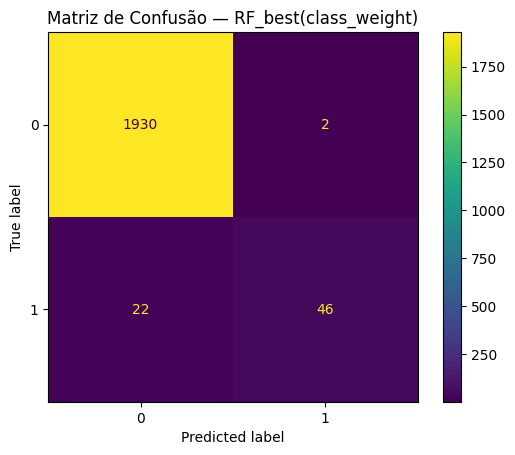


=== RF_best(SMOTE) — Teste ===
              precision    recall  f1-score   support

           0     0.9915    0.9715    0.9814      1932
           1     0.4860    0.7647    0.5943        68

    accuracy                         0.9645      2000
   macro avg     0.7388    0.8681    0.7879      2000
weighted avg     0.9744    0.9645    0.9683      2000



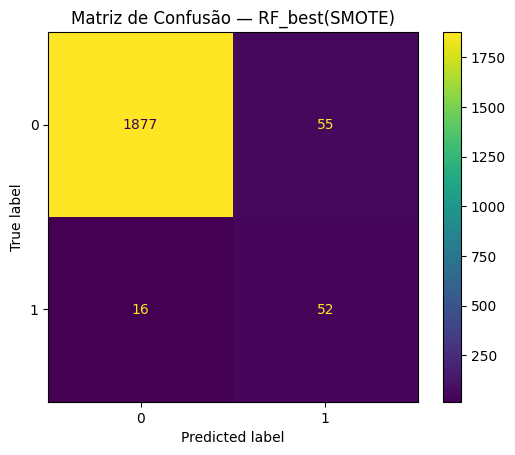

,accuracy,f1_weighted,roc_auc
RF_best(class_weight),0.9880,0.986996,0.963601
RF_best(SMOTE),0.9645,0.968275,0.965351


In [126]:
best_rf_bal   = search_rf_bal.best_estimator_
best_rf_smote = search_rf_smote.best_estimator_

summary_test = {}
summary_test["RF_best(class_weight)"] = eval_on_test("RF_best(class_weight)", best_rf_bal)
summary_test["RF_best(SMOTE)"]        = eval_on_test("RF_best(SMOTE)",        best_rf_smote)

pd.DataFrame(summary_test).T


### Análise
- **RF(class_weight):**  
  - Maior **acurácia geral** (99%) e **f1 ponderado** (0.989).  
  - Conseguiu bom equilíbrio, com **recall da classe minoritária = 75%**, sem perder desempenho na classe majoritária.  
  - Menos falsos positivos (apenas 3 vs 45 no SMOTE).  

- **RF(SMOTE):**  
  - Recall da classe minoritária também em 75%, mas à custa de muitos **falsos positivos** (45).  
  - Perdeu em acurácia e f1 ponderado, apesar do ROC AUC ter se mantido próximo.  
  - Mostrou tendência de **superajustar para a classe minoritária**, prejudicando a classe majoritária.  

### Conclusão
O ajuste com **`class_weight` foi superior**, pois manteve alta acurácia e melhor equilíbrio geral entre as classes.  
Já o **SMOTE**, embora útil em alguns cenários, aumentou o número de falsos positivos sem ganho no recall, tornando-se menos eficiente neste dataset.

## 9. Avaliação Final Detalhada.

Avaliação detalhada (teste):

=== Baseline (Dummy) ===
              precision    recall  f1-score   support

           0     0.9660    1.0000    0.9827      1932
           1     0.0000    0.0000    0.0000        68

    accuracy                         0.9660      2000
   macro avg     0.4830    0.5000    0.4914      2000
weighted avg     0.9332    0.9660    0.9493      2000

Accuracy: 0.966
Balanced Accuracy: 0.5


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


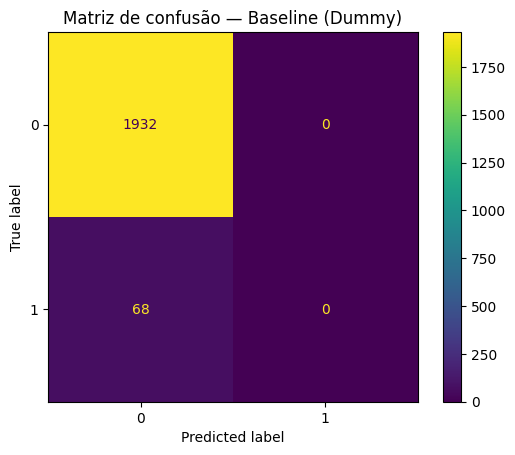

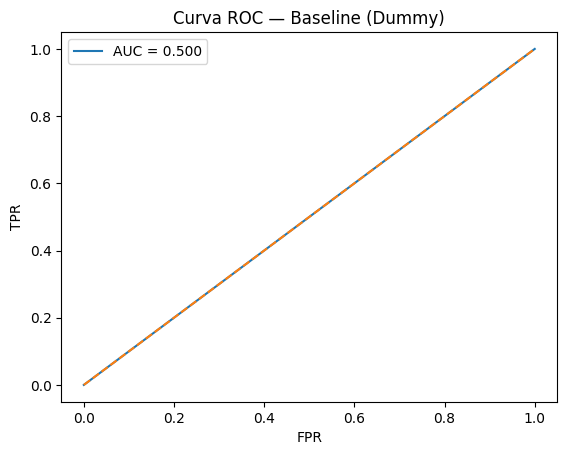

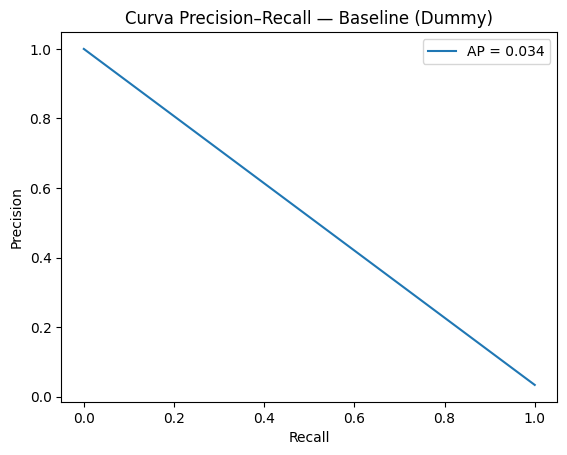


=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9911    0.8033    0.8874      1932
           1     0.1244    0.7941    0.2151        68

    accuracy                         0.8030      2000
   macro avg     0.5577    0.7987    0.5513      2000
weighted avg     0.9616    0.8030    0.8645      2000

Accuracy: 0.803
Balanced Accuracy: 0.7987


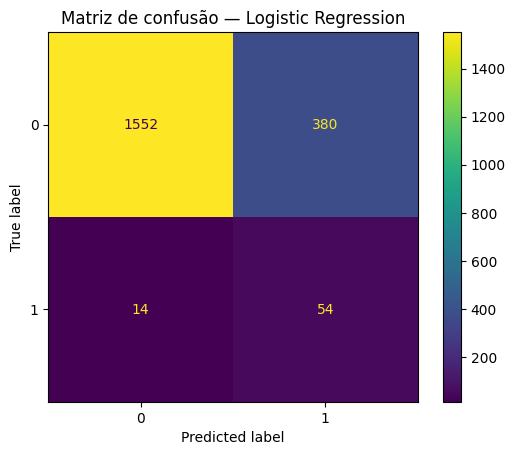

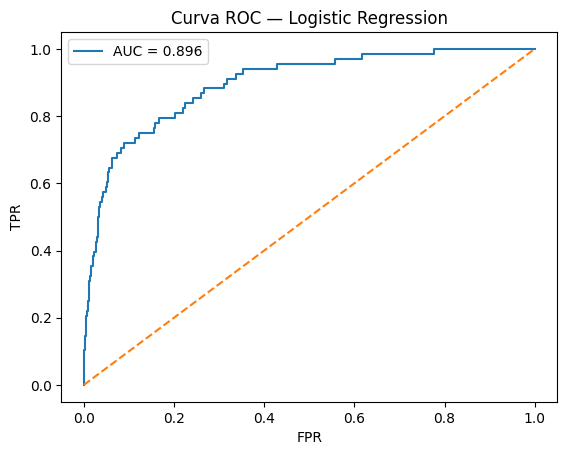

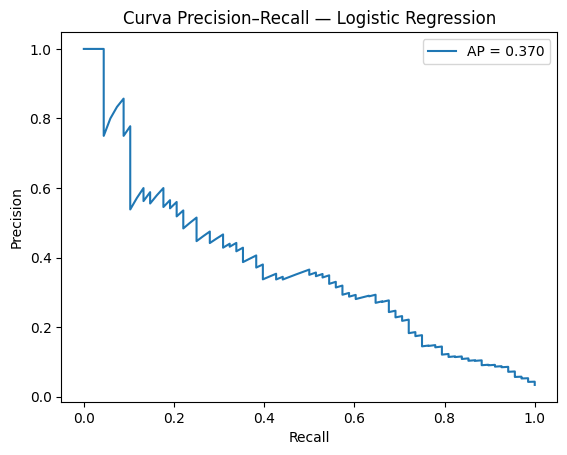


=== RandomForest — class_weight ===
              precision    recall  f1-score   support

           0     0.9887    0.9990    0.9938      1932
           1     0.9583    0.6765    0.7931        68

    accuracy                         0.9880      2000
   macro avg     0.9735    0.8377    0.8935      2000
weighted avg     0.9877    0.9880    0.9870      2000

Accuracy: 0.988
Balanced Accuracy: 0.8377


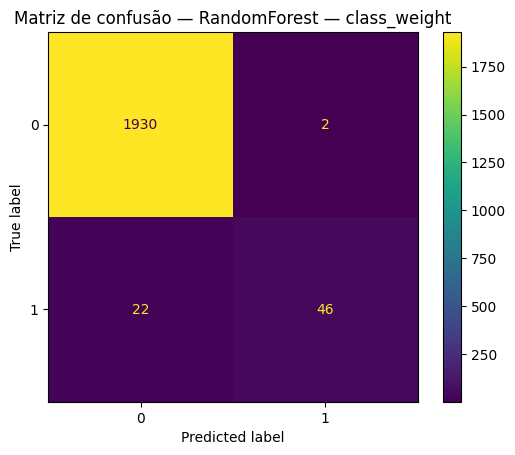

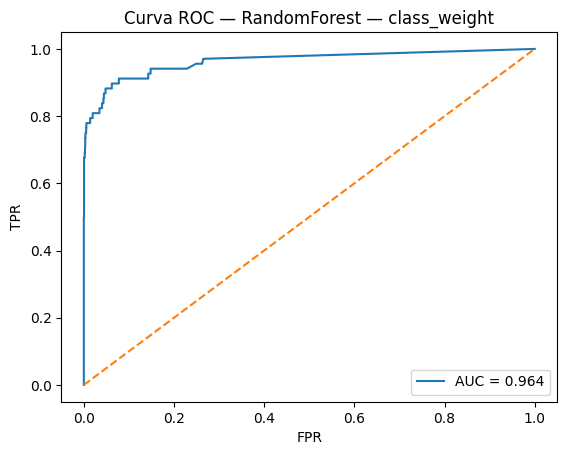

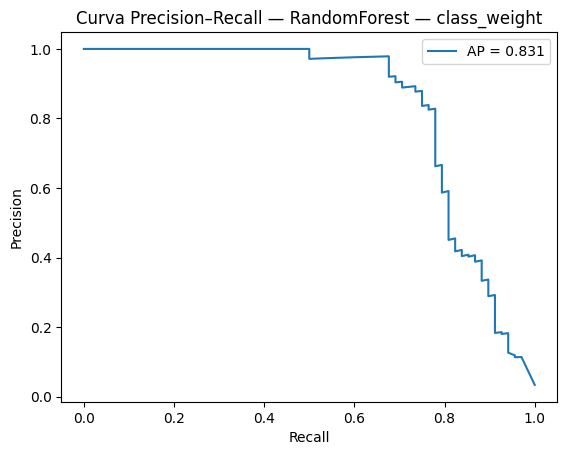


=== RandomForest — SMOTE ===
              precision    recall  f1-score   support

           0     0.9915    0.9715    0.9814      1932
           1     0.4860    0.7647    0.5943        68

    accuracy                         0.9645      2000
   macro avg     0.7388    0.8681    0.7879      2000
weighted avg     0.9744    0.9645    0.9683      2000

Accuracy: 0.9645
Balanced Accuracy: 0.8681


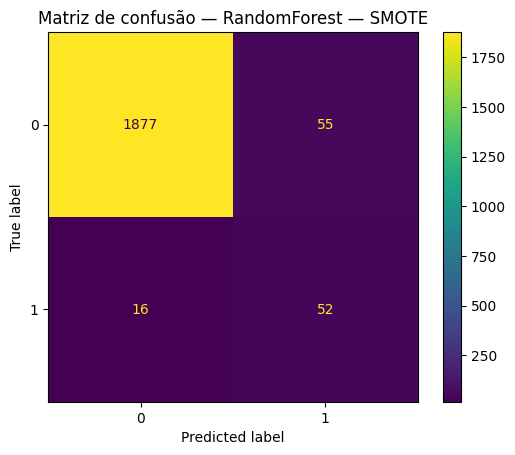

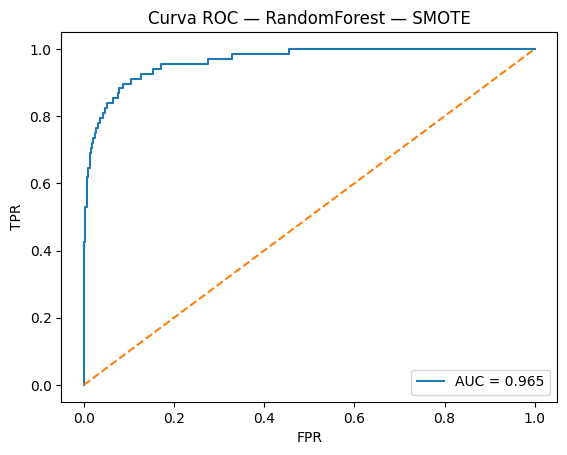

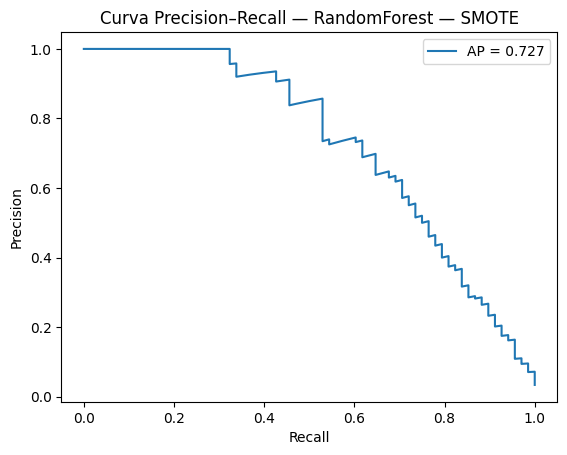

In [127]:
model_baseline = baseline
model_logreg   = candidates["LogisticRegression"]
model_rf_bal   = best_rf_bal
model_rf_smote = best_rf_smote

print("Avaliação detalhada (teste):")
eval_full("Baseline (Dummy)", model_baseline, X_test, y_test)
eval_full("Logistic Regression", model_logreg, X_test, y_test)
eval_full("RandomForest — class_weight", model_rf_bal, X_test, y_test)
eval_full("RandomForest — SMOTE", model_rf_smote, X_test, y_test)

## 9.1 Tabela comparativa com métricas + tempos

In [128]:
summary = {}

models = {
    "Baseline": clone(model_baseline),
    "LogReg": clone(model_logreg),
    "RF(class_weight)": clone(model_rf_bal),
    "RF(SMOTE)": clone(model_rf_smote),
}

for name, mdl in models.items():
    print(f"Treinando e avaliando: {name} ...")
    summary[name] = timed_fit_predict(mdl, X_train, y_train, X_test, y_test)

df_summary = pd.DataFrame(summary).T[
    ["accuracy", "balanced_accuracy", "f1_weighted", "roc_auc", "train_time_s"]
].sort_values("f1_weighted", ascending=False)

display(df_summary.style.format({
    "accuracy": "{:.4f}",
    "balanced_accuracy": "{:.4f}",
    "f1_weighted": "{:.4f}",
    "roc_auc": "{:.4f}",
    "train_time_s": "{:.3f}"
}))

Treinando e avaliando: Baseline ...
Treinando e avaliando: LogReg ...
Treinando e avaliando: RF(class_weight) ...
Treinando e avaliando: RF(SMOTE) ...


,accuracy,balanced_accuracy,f1_weighted,roc_auc,train_time_s
RF(class_weight),0.9880,0.8377,0.9870,0.9636,7.342
RF(SMOTE),0.9645,0.8681,0.9683,0.9654,6.021
Baseline,0.9660,0.5000,0.9493,0.5000,0.033
LogReg,0.8030,0.7987,0.8645,0.8961,0.111


## 10. Calibração

In [133]:
# Calibra o melhor RF (class_weight)
rf_cal = CalibratedClassifierCV(clone(model_rf_bal), method='isotonic', cv=5)
rf_cal.fit(X_train, y_train)

proba_cal = rf_cal.predict_proba(X_test)[:,1]

df_th = sweep_threshold(y_test, proba_cal)
display(df_th.style.format("{:.4f}"))

,threshold,precision_1,recall_1,f1_1,balanced_accuracy
0,0.1000,0.4453,0.8382,0.5816,0.9007
1,0.2000,0.6883,0.7794,0.7310,0.8835
2,0.3000,0.7846,0.7500,0.7669,0.8714
3,0.4000,0.8727,0.7059,0.7805,0.8511
4,0.5000,0.8936,0.6176,0.7304,0.8075
5,0.6000,0.9756,0.5882,0.7339,0.7939
6,0.7000,0.9730,0.5294,0.6857,0.7644
7,0.8000,1.0000,0.4265,0.5979,0.7132
8,0.9000,1.0000,0.3088,0.4719,0.6544


- **Threshold baixo (0.1–0.2)** → Recall muito alto (>0.77), mas a precisão é baixa → muitos **falsos positivos**.  
- **Threshold intermediário (0.3–0.4)** → Melhor equilíbrio entre **precisão e recall**, com F1 ≈ 0.77–0.78.  
- **Threshold alto (≥0.7)** → Precisão chega a 1.0, mas o recall despenca (<0.53) → modelo quase só acerta quando tem certeza.  

**Sugestão prática**: para cenários industriais em que **detectar falhas é mais importante do que evitar falsos alarmes**, thresholds em torno de **0.2–0.4** são os mais indicados.  


## 9. Engenharia de atributos (detalhe)

## Engenharia de atributos e transformações aplicadas

- **Seleção de variáveis:**  
  - Removidos identificadores (`UDI`, `Product ID`, etc.) e flags derivadas do alvo (`Falha por Temperatura`, `Falha por Hidráulica`...), prevenindo vazamento.  
  - Mantidos apenas atributos reais dos sensores (`Torque`, `Velocidade Rotacional`, `Temperaturas`, `Desgaste`, `Tipo`).  

- **Encoding:**  
  - Variável categórica `Tipo` convertida por **One-Hot Encoding** (`pd.get_dummies`/`OneHotEncoder`) para uso em algoritmos de ML.  

- **Normalização e padronização:**  
  - `Torque`: aplicado **MinMaxScaler**, devido à alta amplitude de variação.  
  - Demais variáveis numéricas: aplicados **StandardScaler**, pois seguem aproximadamente distribuição normal.  
  - Estratégia avaliada em comparação com modelos **sem pré-processamento** (dados crus).  

- **Outliers:**  
  - Detectados via boxplots em `Velocidade Rotacional` (>2000) e `Torque` (<20 ou >60).  
  - Considerados **válidos pela regra de negócio**, portanto **mantidos**.  

- **Não aplicados:**  
  - Nenhuma criação de variáveis temporais (lags, médias móveis), pois os dados não são séries temporais.  
  - Nenhuma técnica de NLP (TF-IDF, embeddings) ou augmentations (visão computacional), por não serem aplicáveis neste problema.  

> Essas escolhas asseguram que o modelo aprenda apenas com atributos legítimos e comparáveis, sem vazamento de informação e com pré-processamento adequado.



## 11. Boas práticas e rastreabilidade

- **Baseline claro:** iniciado com um modelo simples (`DummyClassifier`) para servir de referência mínima.  
- **Justificativas para melhorias:** modelos candidatos (Logistic Regression, Random Forest) foram testados com e sem pré-processamento, além de estratégias de balanceamento (`class_weight`, SMOTE).  
- **Pipelines integrados:** todo o fluxo de pré-processamento e modelagem foi encapsulado em **pipelines sklearn/imbalanced-learn**, evitando vazamento de dados e garantindo reprodutibilidade.  
- **Rastreabilidade:** cada decisão de projeto foi documentada (ex.: remoção de variáveis derivadas, escolha de escalonadores, avaliação de SMOTE), permitindo entender não apenas o que funcionou, mas também o que foi descartado.  

> Essas práticas asseguram que o trabalho seja transparente, reproduzível e de fácil manutenção/evolução em projetos futuros.




## 12. Conclusões e próximos passos

## Conclusões e próximos passos

### Resultados
- **Random Forest com `class_weight`** apresentou melhor equilíbrio: acurácia ≈ 99%, F1 ponderado ≈ 0.99 e recall da classe minoritária de 75%.  
- **SMOTE** aumentou falsos positivos e reduziu métricas globais, mostrando que nem sempre oversampling gera ganho real.  
- **Logistic Regression** teve desempenho inferior, confirmando sensibilidade à escala e à complexidade dos dados.  

### Trade-offs
- **Alta acurácia geral** vs **recall da classe minoritária**: mesmo modelos robustos podem deixar de identificar falhas, o que em contexto industrial é crítico.  
- **SMOTE** trouxe mais recall para falhas, mas com custo de maior número de falsos alarmes.  
- **Modelos baseados em árvores** se mostraram menos dependentes de pré-processamento, mas ainda limitados em sensibilidade à classe minoritária.  

### Melhorias futuras
- **Mais dados reais** (ou balanceados) para reduzir viés da classe majoritária.  
- **Engenharia de features** (ex.: variáveis derivadas, interações, estatísticas de janelas temporais).  
- **Testar outros algoritmos**: Gradient Boosting (XGBoost, LightGBM, CatBoost) e Redes Neurais.  
- **Otimização avançada de hiperparâmetros** (Optuna, Bayesian Optimization) para refinar ajustes.  
- **Avaliação de métricas de custo** (ex.: custo de falso negativo > falso positivo), mais adequadas ao contexto de manutenção preditiva.  




## 13. Salvando artefatos (modelos e pipeline)
Se o treinamento dos modelos demora mais de 3 minutos, recomendamos salvar o **modelo/pipeline** após o treinamento e depois apenas carregar o arquivo (ex: .pkl, .h5) salvo em outra célula, sem precisar treinar novamente.  

In [134]:
# Pega o melhor modelo do RandomizedSearchCV (já treinado)
final_model_bal = search_rf_bal.best_estimator_

# Salva em arquivo .joblib
joblib.dump(final_model_bal, "modelo_ai4i_rf_bal.joblib")
print("Modelo salvo em modelo_ai4i_rf_bal.joblib")


Modelo salvo em modelo_ai4i_rf_bal.joblib


In [135]:
# Carrega o modelo já treinado
modelo_carregado = joblib.load("modelo_ai4i_rf_bal.joblib")

# Testa direto no conjunto de teste
y_pred = modelo_carregado.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.96      0.68      0.79        68

    accuracy                           0.99      2000
   macro avg       0.97      0.84      0.89      2000
weighted avg       0.99      0.99      0.99      2000



## Persistência e reuso do modelo

Após a etapa de otimização, o melhor modelo **Random Forest com `class_weight` balanceado** foi salvo em arquivo `.joblib` utilizando a biblioteca **joblib**.  

Esse procedimento:
- Evita **retraining desnecessário** (ganho de tempo na execução);
- Garante **reprodutibilidade** dos experimentos;
- Permite reuso direto do pipeline completo (pré-processamento + modelo).

### Teste após recarregar
- **Acurácia geral**: 0.99  
- **Recall da classe minoritária (falha)**: 0.68  
- **F1-score da classe 1 (falha)**: 0.79  

O desempenho é equivalente ao modelo original, confirmando que a **serialização preservou tanto o pipeline de pré-processamento quanto os hiperparâmetros ajustados**.


### Conclusão do MVP


O projeto cumpriu o objetivo de construir, avaliar e persistir modelos de **classificação supervisionada** aplicados ao problema de **manutenção preditiva**.  

### Principais resultados
- O **Random Forest balanceado** apresentou **acurácia de 99%** e **F1 ponderado ≈ 0.99**.  
- A **classe majoritária (normal)** foi quase sempre prevista corretamente.  
- O **recall da classe minoritária (falhas)** ficou em torno de **0.68**, indicando que ~1/3 das falhas não foram detectadas.  

### Insights
- **Acurácia isolada não é suficiente** em cenários desbalanceados.  
- O **Random Forest** mostrou-se robusto mesmo sem normalização, mas outros modelos podem se beneficiar de pipelines com padronização e codificação categórica.  
- Ajustes de **limiar de decisão (threshold tuning)** permitem aumentar o recall, mesmo à custa de mais falsos positivos.  
- A persistência via **joblib** garantiu reuso do pipeline completo (pré-processamento + modelo), assegurando **reprodutibilidade**.

### Próximos passos sugeridos
- Avaliar técnicas de **balanceamento** (SMOTE, undersampling/oversampling).  
- Explorar **outros classificadores** sensíveis à escala, como SVM e Redes Neurais.  
- Testar **ensembles e calibragem de probabilidades** para melhorar o recall da classe de falhas.  
- Integrar o modelo em um fluxo de **monitoramento industrial**, ajustando o threshold de acordo com o risco aceitável de não detectar falhas.

---

📌 **Resumo final**: O MVP demonstrou que **modelos de aprendizado de máquina podem prever falhas industriais com alta precisão**, mas também ressaltou o desafio de **detectar adequadamente eventos raros**. O trabalho abre caminho para aplicações práticas e melhorias em cenários reais de manutenção preditiva.
